# EXPLORATORY DATA ANALYSIS

IMPORTING THE LIBRARIES

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
#loading the csv file and giving d1 as file name
d1=pd.read_csv("space_server.csv")
d1.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [60]:
d1.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [61]:
d1.shape

(10000, 18)

#There are 10000 rows and 18 columns in this dataset

In [62]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [63]:
#To check the number of unique entries in each column
d1.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

#objid and rerun columns have all unique values.so these columns can be dropped

In [64]:
#we can drop the unwanted columns from our dataset that are not much important for our analysis.
d1.drop('objid',inplace=True,axis=1)
d1.drop('rerun',inplace=True,axis=1)

In [65]:
d1.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

#there are no null values in our dataset

In [66]:
#implying label encoder on class column to convert into integer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d1['class']=le.fit_transform(d1['class'])

In [67]:
d1.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512


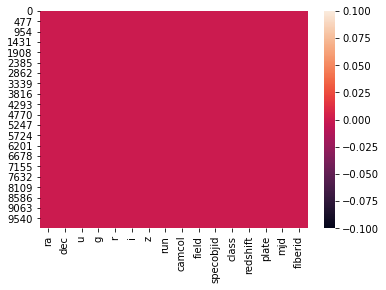

In [68]:
#presence of null values can be checked in visual method using heatmap
sns.heatmap(d1.isnull())

#since the lines are not interrupted,there are no null values

In [12]:
d1.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


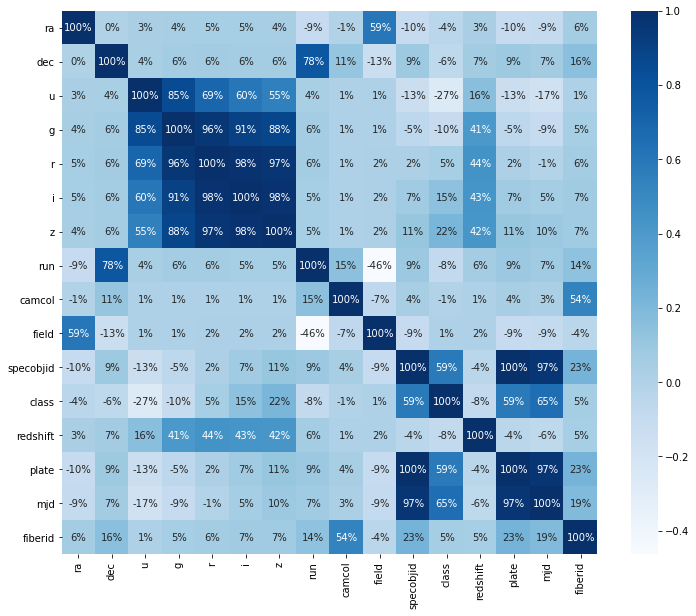

In [13]:
d1cor=d1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(d1cor,cmap='Blues',annot=True,fmt='.0%')
plt.show()

In [14]:
#correlation can be expressed in matrix form also
corr_matrix=d1.corr()
print(corr_matrix["class"].sort_values(ascending=False))

class        1.000000
mjd          0.648768
plate        0.585495
specobjid    0.585493
z            0.215758
i            0.146791
fiberid      0.053593
r            0.049628
field        0.007713
camcol      -0.006186
ra          -0.043219
dec         -0.058918
redshift    -0.075510
run         -0.078162
g           -0.099212
u           -0.269044
Name: class, dtype: float64


In [15]:
collist=d1.columns.values
ncol=20
nrows=7

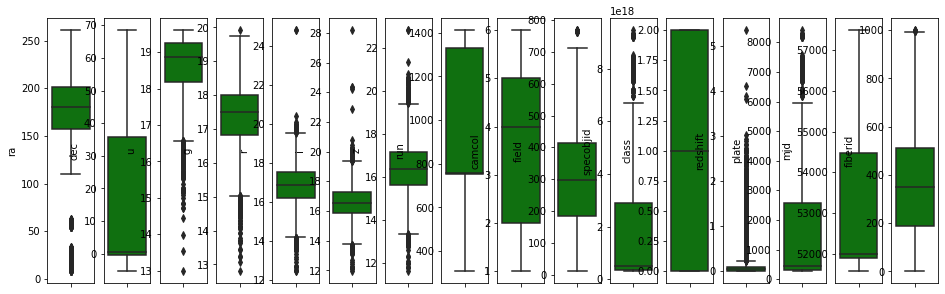

In [16]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')

#Black dots in the boxplot represents outliers

# UNIVARIATE ANALYSIS

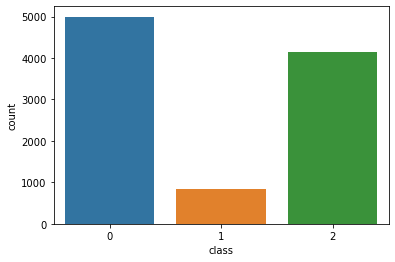

In [18]:
sns.countplot(d1["class"])

0-galaxy
1-quasarobject
2-star

Text(0.5, 1.0, 'ra distribution')

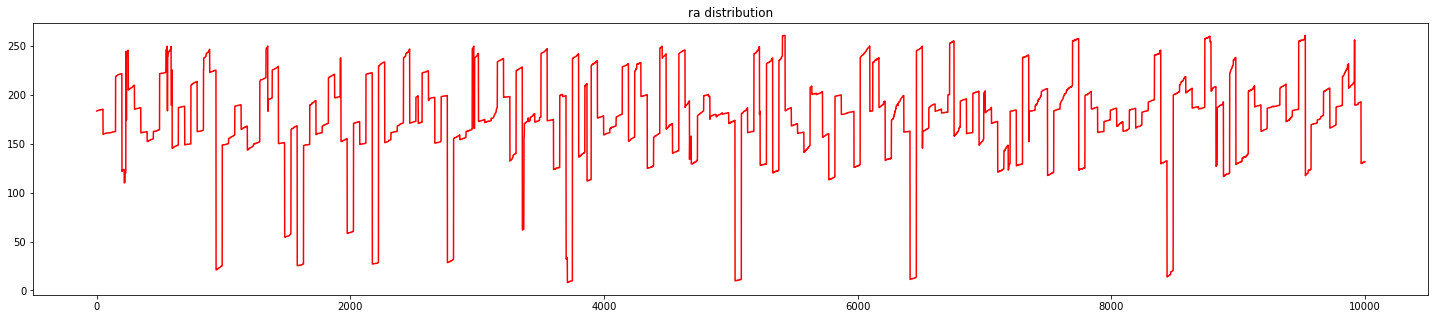

In [19]:
plt.figure(figsize=(25,5))
plt.plot(d1['ra'],color='red');
plt.title('ra distribution')

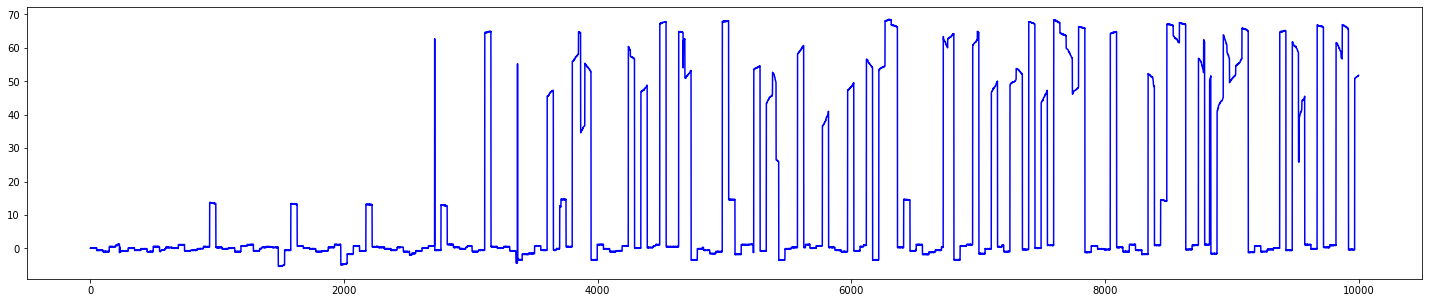

In [20]:
plt.figure(figsize=(25,5))
plt.plot(d1['dec'],color='blue');

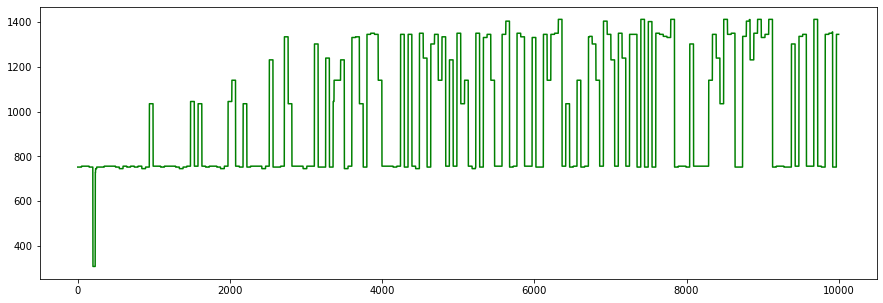

In [21]:
plt.figure(figsize=(15,5))
plt.plot(d1['run'],color='green');

# BIVARIATE ANALYSIS

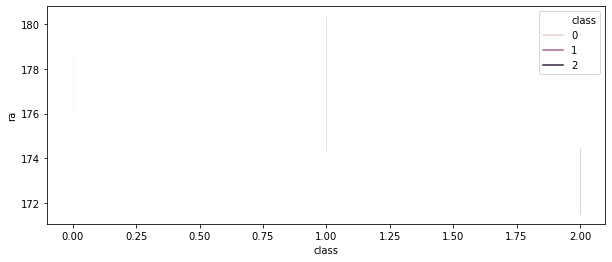

In [22]:
f, ax=plt.subplots(figsize=(10,4))
sns.lineplot(x='class', y='ra',hue='class',data=d1)

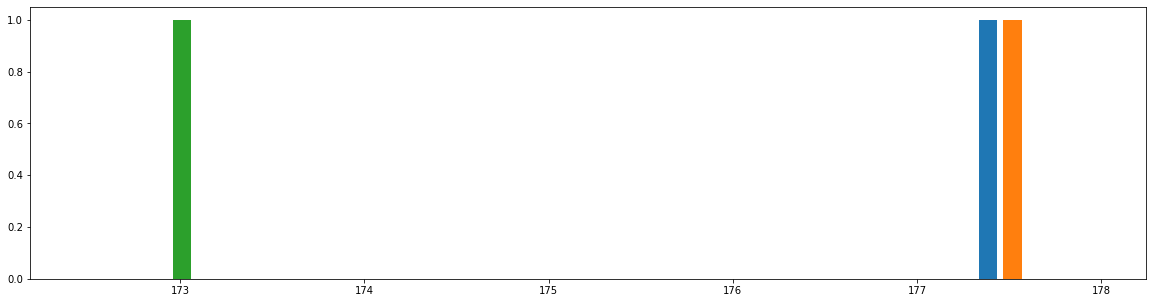

In [23]:
plt.figure(figsize=(20,5))
plt.hist(d1[d1['class']==0]['ra'].mean(),label='GALAXY');
plt.hist(d1[d1['class']==1]['ra'].mean(),label='SQO');
plt.hist(d1[d1['class']==2]['ra'].mean(),label='STAR');

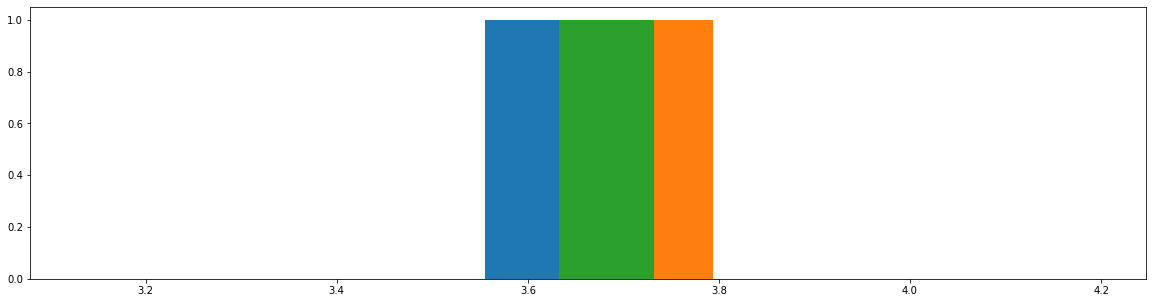

In [24]:
plt.figure(figsize=(20,5))
plt.hist(d1[d1['class']==0]['camcol'].mean(),label='GALAXY');
plt.hist(d1[d1['class']==1]['camcol'].mean(),label='SQO');
plt.hist(d1[d1['class']==2]['camcol'].mean(),label='STAR');

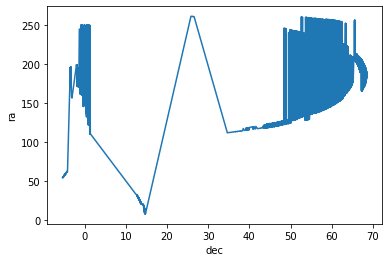

In [25]:
sns.lineplot(x="dec",y="ra",data=d1)
plt.show()

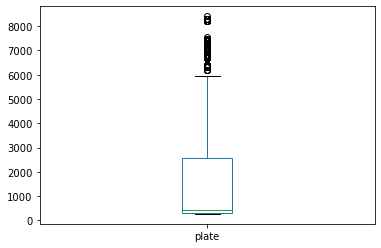

In [26]:
d1["plate"].plot.box()

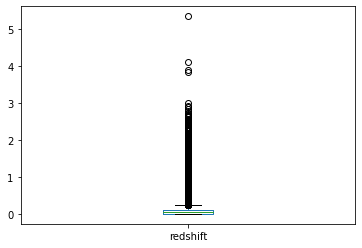

In [27]:
d1["redshift"].plot.box()

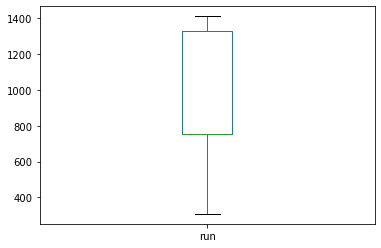

In [28]:
d1["run"].plot.box()

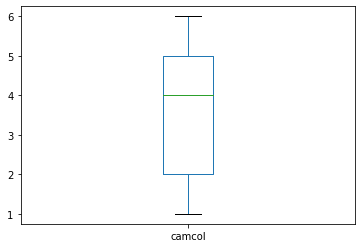

In [29]:
d1["camcol"].plot.box()

In [30]:
d1.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [33]:
d1.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

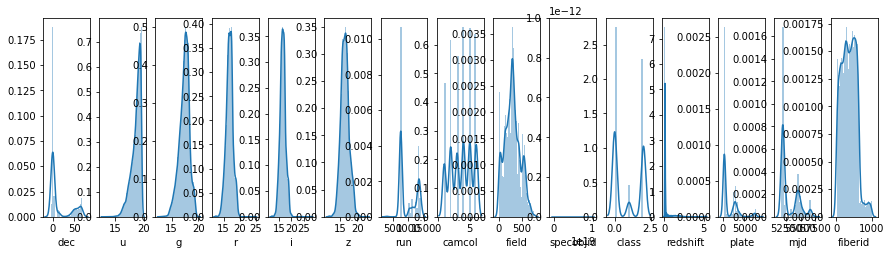

In [34]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

In [35]:
#skewness can be removed using yeo_johnson method
from sklearn.preprocessing import power_transform
d1=pd.DataFrame(power_transform(d1,method='yeo-johnson'),columns=d1.columns)
d1.skew()

ra          -0.154576
dec         -0.483246
u           -0.230857
g           -0.004435
r            0.016190
i            0.001939
z            0.000961
run          0.011906
camcol      -0.151388
field       -0.145970
specobjid    0.000000
class        0.085705
redshift     0.858765
plate        0.404242
mjd          0.939098
fiberid     -0.189274
dtype: float64

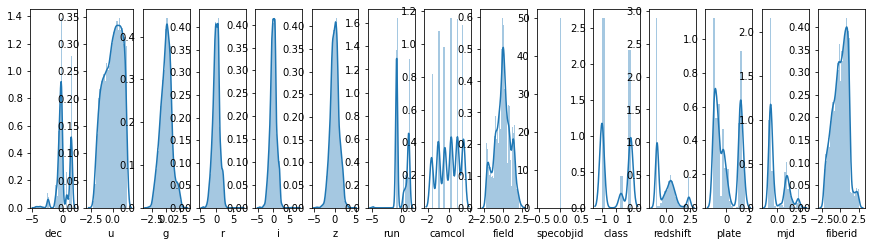

In [36]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

In [38]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  float64
 8   camcol     10000 non-null  float64
 9   field      10000 non-null  float64
 10  specobjid  10000 non-null  float64
 11  class      10000 non-null  float64
 12  redshift   10000 non-null  float64
 13  plate      10000 non-null  float64
 14  mjd        10000 non-null  float64
 15  fiberid    10000 non-null  float64
dtypes: float64(16)
memory usage: 1.2 MB


In [39]:
d1.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [69]:
#Implementing Zscore to remove the presence of outliers
from scipy.stats import zscore
columns=['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid','redshift', 'plate', 'mjd', 'fiberid']
for i in range(len(columns)):
    d1[columns[i]]=zscore(d1[columns[i]])
    for j in range(len(d1[columns[i]])):
        if d1[columns[i]][j]>3 or d1[columns[i]][j]<-3:
            d1[columns[i]].replace(d1[columns[i]][j],d1[columns[i]].median(),inplace=True)
            d1[columns[i]]=np.cbrt((d1[columns[i]]))

In [70]:
#Assigning x and y values to train the data
x=d1[columns]
y=d1[["class"]]

In [71]:
#Checking the shape of assigned x and y
print(x.shape)
print(y.shape)

(10000, 15)
(10000, 1)


In [72]:
#Implementing standard scaler to scale the values to a common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.5792918 , -0.58492272,  0.97629213, ...,  1.38540988,
         1.40685464,  0.9648616 ],
       [ 0.58110392, -0.58311429,  0.25716921, ..., -0.72327022,
        -0.81088049,  1.06861362],
       [ 0.58330229, -0.58347525,  0.93418526, ..., -0.73338873,
        -0.69169791,  1.01316637],
       ...,
       [-1.21947418,  1.46090664,  0.45726891, ...,  1.91898911,
         1.72816506,  1.20299093],
       [-1.22013008,  1.46432109,  0.60570018, ..., -0.6866899 ,
        -0.73777856, -0.91253801],
       [-1.21849473,  1.46639319,  0.88013098, ..., -0.6866899 ,
        -0.73777856, -0.90251971]])

In [73]:
d1.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [74]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  float64
 8   camcol     10000 non-null  float64
 9   field      10000 non-null  float64
 10  specobjid  10000 non-null  float64
 11  class      10000 non-null  int32  
 12  redshift   10000 non-null  float64
 13  plate      10000 non-null  float64
 14  mjd        10000 non-null  float64
 15  fiberid    10000 non-null  float64
dtypes: float64(15), int32(1)
memory usage: 1.2 MB


In [76]:
d1.dtypes

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run         float64
camcol      float64
field       float64
class         int32
redshift    float64
plate       float64
mjd         float64
fiberid     float64
dtype: object

In [77]:
d1=d1.astype(int)

In [78]:
d1.dtypes

ra          int32
dec         int32
u           int32
g           int32
r           int32
i           int32
z           int32
run         int32
camcol      int32
field       int32
class       int32
redshift    int32
plate       int32
mjd         int32
fiberid     int32
dtype: object

# Model selection

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve,roc_auc_score,auc

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 62 is 0.9908


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=62)

In [86]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 15)
(2500, 15)
(7500, 1)
(2500, 1)


In [88]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print("Accuracy score :",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('******************************************************************************')
    print('\n')

score of DecisionTreeClassifier() is: 1.0
Error:
Accuracy score : 0.9904
[[1221   14    2]
 [   7  219    0]
 [   1    0 1036]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1237
           1       0.94      0.97      0.95       226
           2       1.00      1.00      1.00      1037

    accuracy                           0.99      2500
   macro avg       0.98      0.99      0.98      2500
weighted avg       0.99      0.99      0.99      2500

******************************************************************************


score of KNeighborsClassifier() is: 0.9344
Error:
Accuracy score : 0.9036
[[1153   12   72]
 [   7  218    1]
 [ 149    0  888]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1237
           1       0.95      0.96      0.96       226
           2       0.92      0.86      0.89      1037

    accuracy                           0.90      2500
   macro 

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,random_state=51)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score : 0.9884
[[1218    8   11]
 [  10  216    0]
 [   0    0 1037]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1237
           1       0.96      0.96      0.96       226
           2       0.99      1.00      0.99      1037

    accuracy                           0.99      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500



In [91]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy score : 0.8856
[[1205   24    8]
 [ 197   29    0]
 [  57    0  980]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1237
           1       0.55      0.13      0.21       226
           2       0.99      0.95      0.97      1037

    accuracy                           0.89      2500
   macro avg       0.79      0.68      0.69      2500
weighted avg       0.87      0.89      0.86      2500



In [92]:
#decision tree classifier is giving the best accuracy score.so checking its cross val score
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()
dtscores=cross_val_score(dt,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.9845 0.982  0.9865 0.9845 0.984 ]
0.9843 0.0014352700094407537


In [93]:
import joblib
joblib.dump(dt,'dt_space_server.pkl')

['dt_space_server.pkl']